# 

In [1]:
import codes.VAE as VAE
import torch
import torch.multiprocessing as mp
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

training_batches, test_batches = VAE.VariationalAutoEncoder.get_FashionMNIST_train_loader()

vaes = []
for i in [2,4,6,8,10]:
    vae = VAE.VariationalAutoEncoder(i, 0, convolutional = True)
    vae.set_train_loader(training_batches, test_batches)
    vaes.append((i, vae))

Processing...
Done!


In [2]:
for i, vae in vaes[0:1]:
    vae.start()
    #Lets get the trained models from the disk instead
    #vae.load_state_dict(torch.load("./data/saved_models/vae_minst_{}.ptc".format(i),  map_location={'cuda:0': 'cpu'}))

started False


In [5]:
vae.get_progress()

[]

<IPython.core.display.Javascript object>


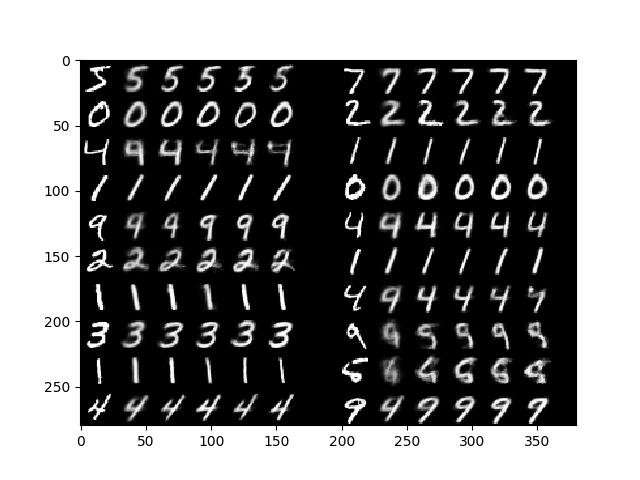

In [3]:
import matplotlib.pyplot as plt
import numpy
%matplotlib notebook

training_batch = next(iter(training_batches))
test_batch = next(iter(test_batches))

im = numpy.zeros((280,380))
for i in range(10):
    im[i*28:i*28+28,0:28] = Variable((training_batch))[i,0].data
    for j in range(5):
        im[i*28:i*28+28,(j+1)*28:(j+1)*28+28] = vaes[j][1](Variable((training_batch)))[i,0].data

for i in range(10):
    im[i*28:i*28+28,7*28:7*28+28] = Variable((test_batch))[i,0].data
    for j in range(5):
        im[i*28:i*28+28,(j+8)*28:(j+8)*28+28] = vaes[j][1](Variable((test_batch)))[i,0].data
        
plt.imshow(im, cmap="gray")

In [8]:
import torch
from torchvision import datasets, transforms
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size)

In [9]:
points = []
for data, labels in list(train_loader)[0:15]:
    s = vaes[0][1].encoder(Variable(data))
    for  point, label in zip(s[1].data.numpy(), labels):
        points.append((point, label))

In [10]:
import pandas
df = pandas.DataFrame(points, columns=["point","label"])

<IPython.core.display.Javascript object>


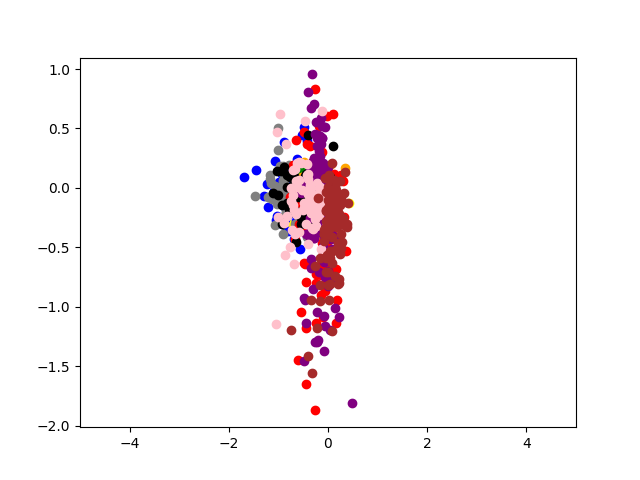

In [11]:
import matplotlib.pyplot as plt
import numpy
%matplotlib notebook
plt.xlim(-5,5)
colors = ["green","yellow","blue","orange","gray","red","black","purple","pink","brown"]
groups = df.groupby("label")
for key, group in groups:
    x=group["point"].apply(lambda x: x[0])
    y=group["point"].apply(lambda x: x[1])
    plt.plot(x,y,"o", color=colors[key])

In [90]:
from sklearn.metrics import silhouette_score
silhouette_score(numpy.array([list(point) for point in (df["point"])]), numpy.array(df["label"]))

0.1487785

<IPython.core.display.Javascript object>


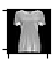

In [62]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.imshow(ds[10][0][0].numpy(), cmap="gray")

In [2]:
from torchvision import datasets, transforms
ds = datasets.FashionMNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ]))

In [3]:
ds[0]

(
 (0 ,.,.) = 
 
 Columns 0 to 8 
    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   

In [50]:
ds[5][0]


(0 ,.,.) = 

Columns 0 to 8 
   0.0000  0.0000  0.0000  0.0000  0.0039  0.0000  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  0.0039  0.0000  0.0000  0.0784  0.5137  0.7804
  0.0000  0.0000  0.0000  0.0039  0.0000  0.1373  0.8392  0.7490  0.7176
  0.0000  0.0000  0.0000  0.0000  0.0000  0.6667  0.7451  0.6745  0.6941
  0.0000  0.0000  0.0000  0.0000  0.0980  0.7608  0.7059  0.6980  0.6824
  0.0000  0.0000  0.0000  0.0000  0.1647  0.8549  0.7490  0.7725  0.8157
  0.0000  0.0000  0.0000  0.0000  0.3451  0.8667  0.8431  0.8510  0.8588
  0.0000  0.0000  0.0000  0.0000  0.0000  0.1059  0.4627  0.6353  0.1569
  0.0000  0.0000  0.0000  0.0000  0.5412  0.5333  0.2784  0.2706  0.2118
  0.0000  0.0000  0.0000  0.0000  0.2627  0.5255  0.6039  0.8784  0.5059
  0.0000  0.0000  0.0000  0.0000  0.7961  0.7765  0.6745  0.7176  0.8078
  0.0000  0.0000  0.0000  0.0000  0.4784  0.7373  0.8784  0.5922  0.4118
  0.0000  0.0000  0.0000  0.0000  0.6392  0.7020  0.7843  0.3725  0.6039
  0.0000  0.0000  0.